# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [2]:
# WRITE YOUR CODE HERE
#install.packages("glmnet")
library(glmnet)
library(tidyverse)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [8]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [9]:
# WRITE YOUR CODE HERE
d1<-data.frame(y=y, x=x)

test<-sample(1:n, 51)

d1_test<-d1[test,]
dim(d1_test)
d1_train<-d1[-test,]
dim(d1_train)

[1] 51  2

[1] 50  2

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

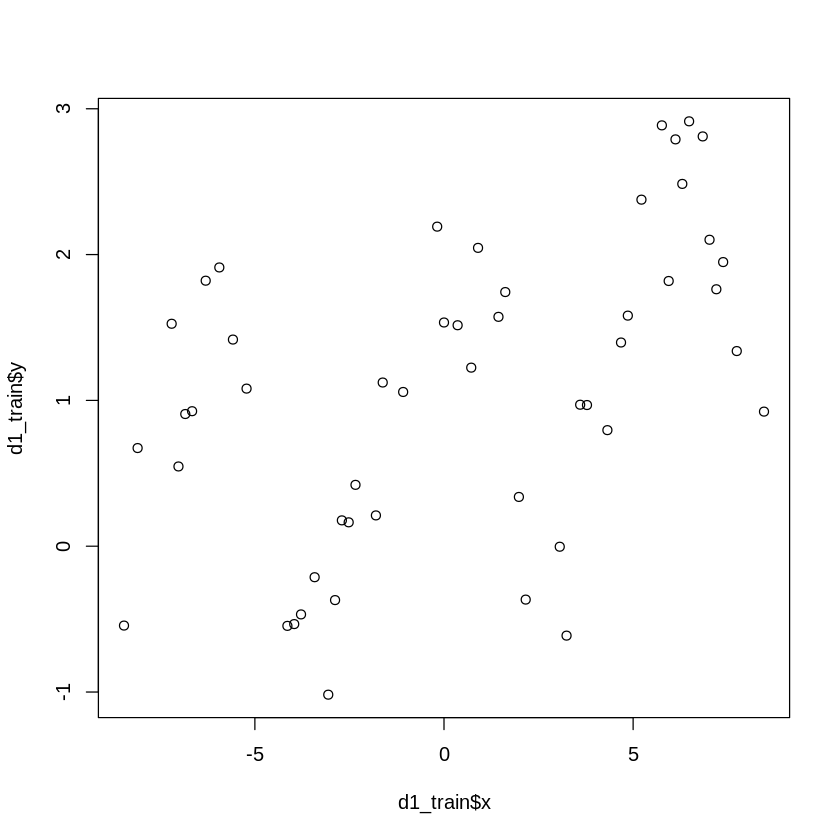

In [10]:
# WRITE YOUR CODE HERE
plot(d1_train$x,d1_train$y)


How would you describe the relationship between $x$ and $y$ based on this plot?

> *Write your response here*
> I see a cyclical relation between $x$ and $y$ (coming from the cos function in the data simulation process) but it has a generally increasing trend.

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results.


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

y,1,2
-0.5442746,-8.46,71.5716
0.6732243,-8.10,65.6100
1.5256458,-7.20,51.8400
0.5469083,-7.02,49.2804
0.9066007,-6.84,46.7856
0.9259283,-6.66,44.3556



Call:
lm(formula = y ~ ., data = as.data.frame(poly2_d1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.79624 -0.62956  0.01281  0.78174  1.47047 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.738572   0.193066   3.825 0.000384 ***
`1`         0.098563   0.025281   3.899 0.000306 ***
`2`         0.011917   0.005927   2.011 0.050123 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8869 on 47 degrees of freedom
Multiple R-squared:  0.3006,	Adjusted R-squared:  0.2708 
F-statistic:  10.1 on 2 and 47 DF,  p-value: 0.0002246


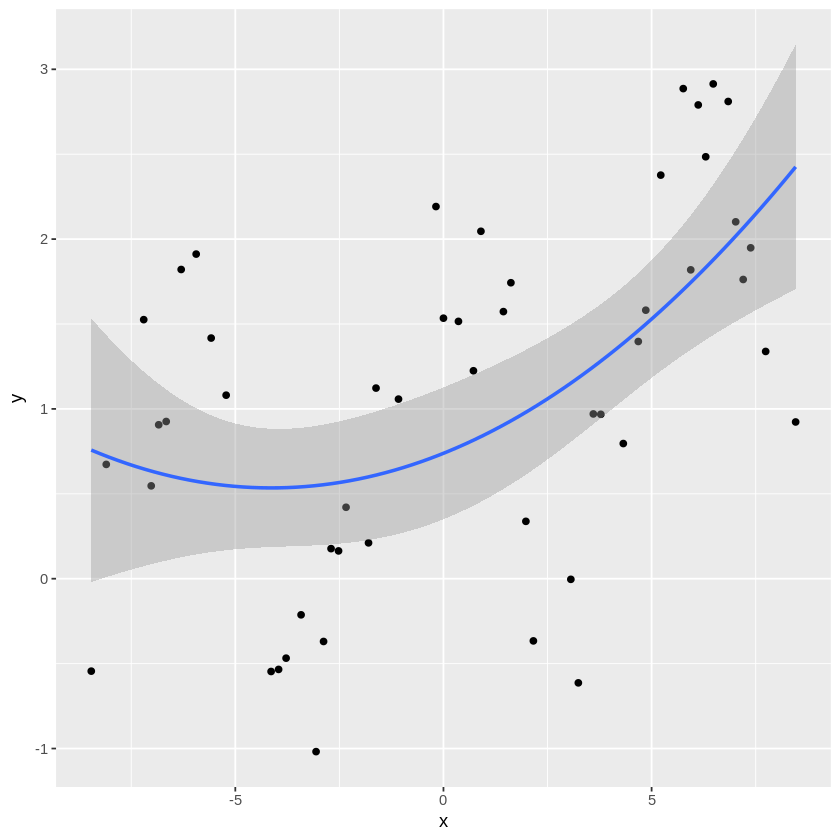

In [12]:
# WRITE YOUR CODE HERE
#help(stat_smooth)
#help(poly)
new_x<-poly(d1_train$x,2, raw = TRUE)
poly2_d1<-cbind(d1_train$y,new_x)
colnames(poly2_d1)[1]<-"y"
head(poly2_d1)

reg.poly<-lm(y ~ ., data = as.data.frame(poly2_d1))
summary(reg.poly)

ggplot(d1_train, aes(x, y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x,2, raw = TRUE))

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better?

> *Write your response here*
> It has a very low R^2. It looks like it fits the data pretty poorly. It captures the upward trend in the data, but entirely ignores the cyclical trend in the data. It could do better if it could capture this cyclical trend.

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

y,1,2,3,4,5,6,7,8,9,10,11,12
-0.5442746,-8.46,71.5716,-605.4957,5122.494,-43336.30,366625.09,-3101648.2,26239944,-221989926,1878034778,-15888174222,134413953915
0.6732243,-8.10,65.6100,-531.4410,4304.672,-34867.84,282429.54,-2287679.2,18530202,-150094635,1215766546,-9847709022,79766443077
1.5256458,-7.20,51.8400,-373.2480,2687.386,-19349.18,139314.07,-1003061.3,7222041,-51998698,374390624,-2695612495,19408409962
0.5469083,-7.02,49.2804,-345.9484,2428.558,-17048.48,119680.30,-840155.7,5897893,-41403210,290650531,-2040366730,14323374447
0.9066007,-6.84,46.7856,-320.0135,2188.892,-14972.02,102408.64,-700475.1,4791250,-32772149,224161496,-1533264636,10487530108
0.9259283,-6.66,44.3556,-295.4083,1967.419,-13103.01,87266.06,-581192.0,3870739,-25779118,171688929,-1143448268,7615365463



Call:
lm(formula = y ~ ., data = as.data.frame(poly12_d1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86789 -0.25805 -0.00941  0.30116  0.83609 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.865e+00  2.065e-01   9.035 6.76e-11 ***
`1`         -8.993e-02  1.623e-01  -0.554 0.582929    
`2`         -4.310e-01  1.114e-01  -3.868 0.000429 ***
`3`          4.133e-02  3.612e-02   1.144 0.259873    
`4`          2.570e-02  1.622e-02   1.584 0.121644    
`5`         -2.925e-03  2.701e-03  -1.083 0.285885    
`6`         -2.021e-04  9.403e-04  -0.215 0.830968    
`7`          9.132e-05  8.718e-05   1.048 0.301643    
`8`         -1.289e-05  2.548e-05  -0.506 0.615983    
`9`         -1.304e-06  1.256e-06  -1.038 0.305887    
`10`         2.845e-07  3.233e-07   0.880 0.384552    
`11`         6.891e-09  6.622e-09   1.041 0.304801    
`12`        -1.670e-09  1.549e-09  -1.078 0.287895    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

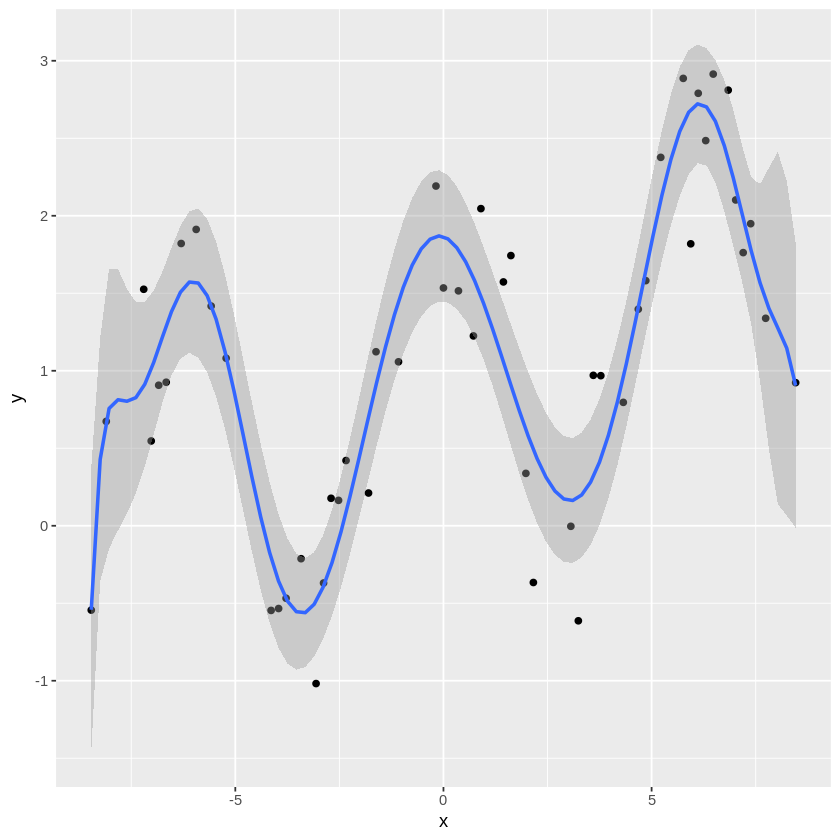

In [14]:
# WRITE YOUR CODE HERE

new_x<-poly(d1_train$x,12, raw = TRUE)
poly12_d1<-cbind(d1_train$y,new_x)
colnames(poly12_d1)[1]<-"y"
head(poly12_d1)

reg.poly<-lm(y ~ ., data = as.data.frame(poly12_d1))
summary(reg.poly)

ggplot(d1_train, aes(x, y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x,12, raw = TRUE))

> *Write your response here*
>  Qualitatively, it looks like it fits the data much better, it traces the cyclical patterns in the data. Also, it has a much higher R^2.

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy.

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 24


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 25


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 26


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 27


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 28


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 29


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 30


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 31


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 32


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 33


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 34


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 35


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 36


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 37


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 38


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 39


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 40


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 41


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 42


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 43


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 44


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 45


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 46


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 47


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 48


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 49


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 50


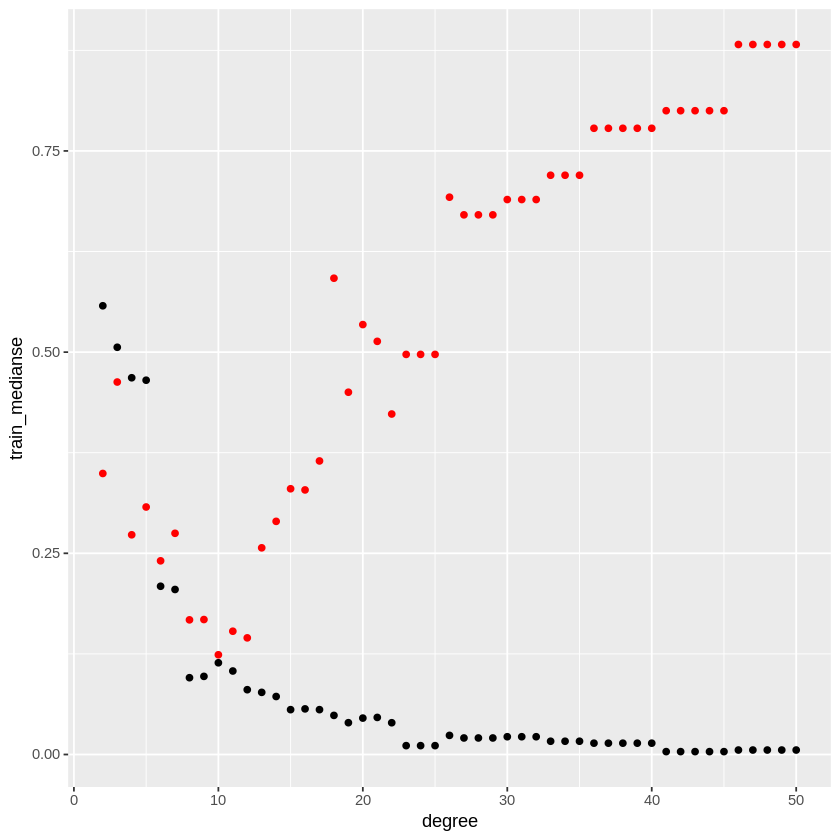

In [15]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
count=1

#print(length(unique(d1_train$x)))
#poly(d1_train$x,24)
# it won't work for polynomial higher than 24...
# use "raw = TRUE" argument
#poly(d1_train$x,24, raw = TRUE)

for (k in degree) {
    # WRITE YOUR CODE HERE
    new_x<-poly(d1_train$x,k, raw = TRUE)
    poly_d1<-cbind(d1_train$y,new_x)
    colnames(poly_d1)[1]<-"y"
    poly_d1<-as.data.frame(poly_d1)
    head(poly_d1)

    reg.poly<-lm(y ~ ., data = poly_d1)

    predicted_y<-predict(reg.poly,poly_d1[,-1])
    train_rss[count]<-median((d1_train$y-predicted_y)^2)

    poly_test_data<-as.data.frame(poly(d1_test$x,k, raw = TRUE))

    predicted_y<-predict(reg.poly,poly_test_data)
    test_rss[count]<-median((d1_test$y-predicted_y)^2)

    count <- count + 1
    print(count)
}

# Plot your results here
# WRITE YOUR CODE HERE
output_rss<-data.frame(degree=degree, train_medianse=train_rss, test_medianse=test_rss)
ggplot(output_rss, aes(degree, train_medianse)) +
  geom_point() +
  geom_point(aes(degree, test_medianse), color = "red")



What do you see as $k$ increase?

> *Write your response here*
> As k increases it looks like train median squared error decreases to near 0 (with more predictors, we fit the trianing data better and better by modeling noise). While the test median squared error decreases with higher degree polynomials in the model up until about the 10th or 12th degree polynomial, the test accuracy starts to suffer after a certain degree as we overfit to the training data with higher and higher degree polynomial regressions.

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 24


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 25


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 26


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 27


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 28


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 29


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 30


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 31


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 32


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 33


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 34


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 35


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 36


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 37


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 38


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 39


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 40


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 41


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 42


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 43


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 44


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 45


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 46


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 47


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 48


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 49


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 50


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 51


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 52


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 53


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 54


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 55


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 56


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 57


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 58


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 59


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 60


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 61


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 62


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 63


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 64


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 65


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 66


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 67


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 68


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 69


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 70


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 71


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 72


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 73


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 74


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 75


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 76


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 77


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 78


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 79


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 80


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 81


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 82


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 83


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 84


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 85


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 86


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 87


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 88


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 89


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 90


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 91


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 92


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 93


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 94


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 95


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 96


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 97


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 98


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 99


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 100


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 101


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 102


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 103


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 104


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 105


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 106


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 107


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 108


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 109


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 110


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 111


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 112


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 113


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 114


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 115


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 116


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 117


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 118


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 119


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 120


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 121


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 122


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 123


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 124


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 125


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 126


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 127


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 128


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 129


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 130


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 131


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 132


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 133


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 134


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 135


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 136


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 137


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 138


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 139


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 140


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 141


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 142


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 143


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 144


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 145


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 146


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 147


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 148


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 149


Warning message in predict.lm(reg.poly, poly_d1[, -1]):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(reg.poly, poly_test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] 150


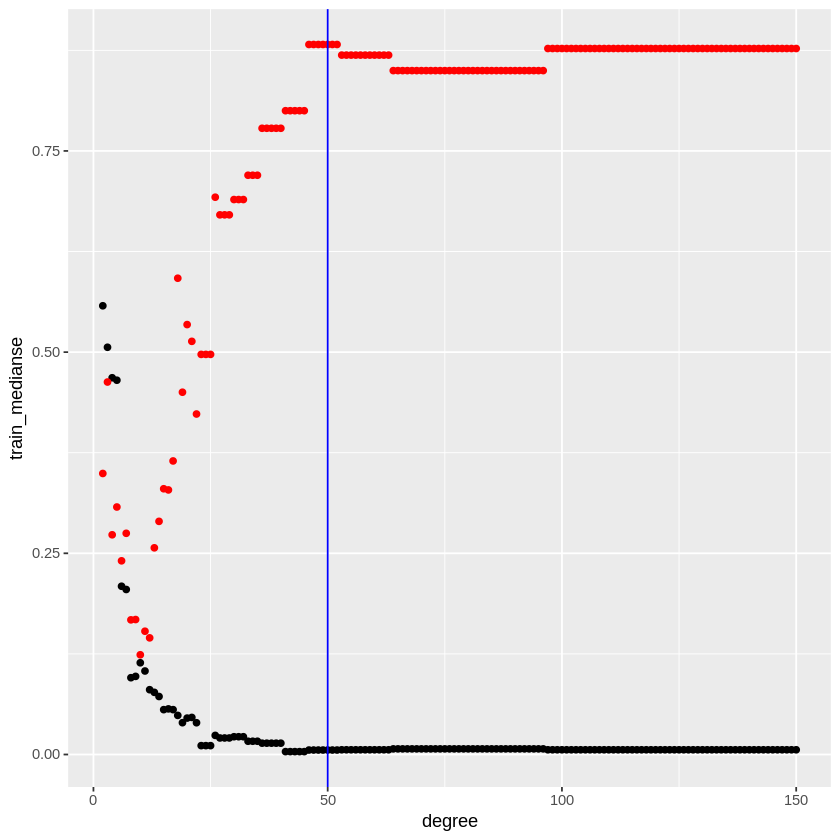

In [18]:
# WRITE YOUR CODE HERE

# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
count=1

#print(length(unique(d1_train$x)))
#poly(d1_train$x,24)
# it won't work for polynomial higher than 24...
# use "raw = TRUE" argument
#poly(d1_train$x,24, raw = TRUE)

for (k in degree) {
    # WRITE YOUR CODE HERE
    new_x<-poly(d1_train$x,k, raw = TRUE)
    poly_d1<-cbind(d1_train$y,new_x)
    colnames(poly_d1)[1]<-"y"
    poly_d1<-as.data.frame(poly_d1)
    head(poly_d1)

    reg.poly<-lm(y ~ ., data = poly_d1)

    predicted_y<-predict(reg.poly,poly_d1[,-1])
    train_rss[count]<-median((d1_train$y-predicted_y)^2)

    poly_test_data<-as.data.frame(poly(d1_test$x,k, raw = TRUE))

    predicted_y<-predict(reg.poly,poly_test_data)
    test_rss[count]<-median((d1_test$y-predicted_y)^2)

    count <- count + 1
    print(count)
}

# Plot your results here
# WRITE YOUR CODE HERE
output_rss<-data.frame(degree=degree, train_medianse=train_rss, test_medianse=test_rss)
ggplot(output_rss, aes(degree, train_medianse)) +
  geom_point() +
  geom_point(aes(degree, test_medianse), color = "red") +
  geom_vline(xintercept = 50, color = "blue")


What do you see as $k$ gets larger than $n$?

> *Write your response here*
> It appeas that as k gets larger than n, train median square error stays close to 0 (so many parameters fit the noise/overfit to the training data reducing error to near 0), but it comes at the cost of worse test median square error, it gets worse overall with larger k and looks like it fluctuates a bit (which makes sense give that with k > n, we have no unique solution so estimates can become unstable).

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time.

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 139
[1

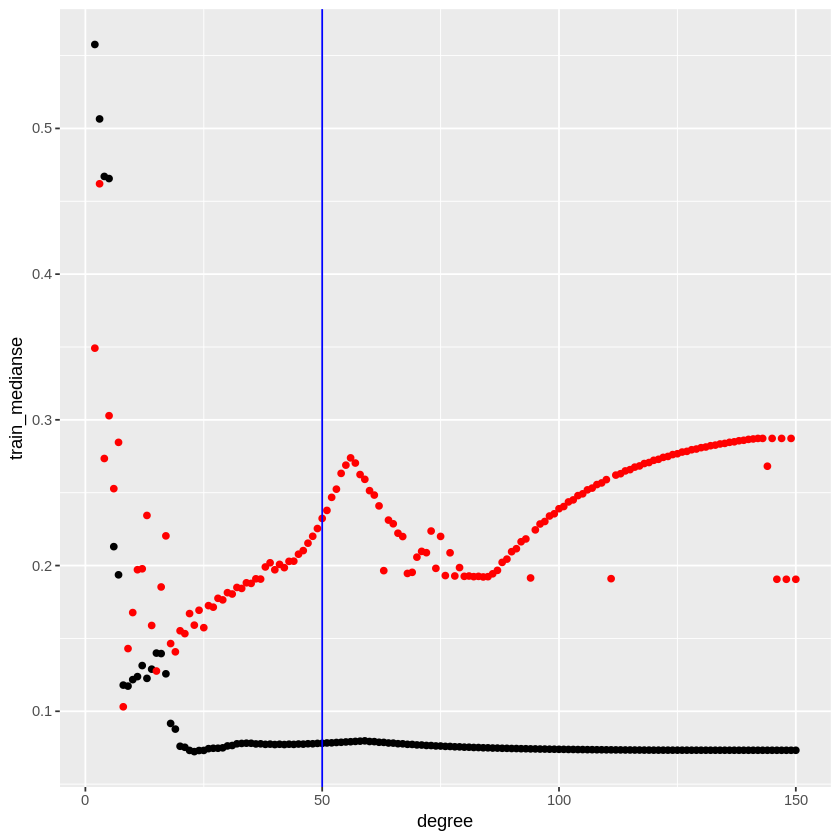

In [20]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
count=1

for (k in degree) {
    # WRITE YOUR CODE HERE
    new_x<-poly(d1_train$x,k, raw = TRUE)
    poly_d1<-cbind(d1_train$y,new_x)
    colnames(poly_d1)[1]<-"y"
    poly_d1<-as.data.frame(poly_d1)
    head(poly_d1)

    x = model.matrix(y~., poly_d1)[,-1]
    y = poly_d1$y
    reg.poly<-glmnet(x, y, alpha=0, lambda=lambda)

    predicted_y<-predict(reg.poly,new_x)
    train_rss[count]<-median((d1_train$y-predicted_y)^2)

    poly_test_data<-poly(d1_test$x,k, raw = TRUE)

    predicted_y<-predict(reg.poly,poly_test_data)
    test_rss[count]<-median((d1_test$y-predicted_y)^2)

    count <- count + 1
    print(count)
}

# Plot your results here
# WRITE YOUR CODE HERE
output_rss<-data.frame(degree=degree, train_medianse=train_rss, test_medianse=test_rss)
ggplot(output_rss, aes(degree, train_medianse)) +
  geom_point() +
  geom_point(aes(degree, test_medianse), color = "red") +
  geom_vline(xintercept = 50, color = "blue")

What happens now when $k$ gets larger than $n$?

> *Write your response here*
> Generally the test median squared error is lower here (although the train median se is higher, which makes sense because ridge penalizes complexity so it pushes some of the coefficients towards 0 away from the estimate that would best fit the training data). It does appear that when k gets larger than n, generally it's the case that test mse gets worse, although there is a small degree space where test mse actually improves noticeably before getting worse again.

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here*
> This happens because the regularization technique pushes some weakly predictive parameters towards 0. It reduces their influence and biases the parameter estimates. This explains why performance on the training set is a little worse (because of the biased parameters estimes) but this increased bias trades off for decreased variance, so that the performance on the test set is a little better. It also means that even when fitting very complex models, the strongly predictive variables will come through while the weakly predictive ones are pushed near 0 so that overfitting is not as much of an issue and so having more parameters for the model to work with could actually sometimes improve performance.

---
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here*
> In the matrix algebra, adding the constraint adds a lambda parameter across the diagonals of the matrix so that it becomes invertible so that one can calculate a unique solution. By pushing certain coefficients to near 0 (adding an additional constraint) it allows us to have a unique solution -- I guess the intuition here is that forcing a certain outcome for the parameter estimates in order to satisfy this constraint, it pins down certain parameter estimates so that there exists a unique solution for the remaining coefficients.  

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*